In [4]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [1]:
from tensorflow.examples.tutorials.mnist import input_data

In [2]:
minst = input_data.read_data_sets("MNIST_data/",one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [3]:
minst.train.images.shape

(55000, 784)

In [9]:
minst.train.images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

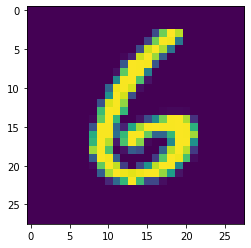

In [11]:
plt.imshow(minst.train.images[1000].reshape(28,28))

In [12]:
minst.train.num_examples

55000

In [13]:
minst.test.images.shape

(10000, 784)

In [14]:
minst.validation.images.shape

(5000, 784)

In [15]:
minst.train.images[200].shape

(784,)

In [17]:
minst.train.images[100].min()

0.0

In [18]:
minst.train.images[100].max()

0.9960785

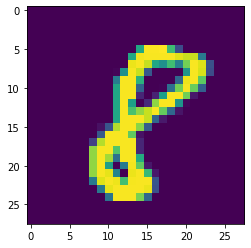

In [19]:
plt.imshow(minst.train.images[7400].reshape(28,28))

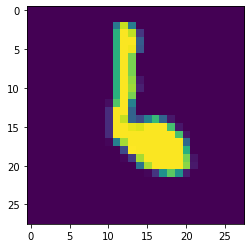

In [20]:
plt.imshow(minst.train.images[600].reshape(28,28))

In [21]:
batch_x , batch_y = minst.train.next_batch(200)

In [22]:
batch_x.shape

(200, 784)

In [23]:
batch_y.shape

(200, 10)

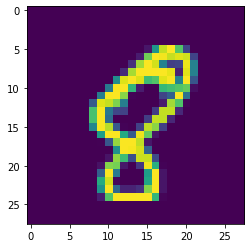

In [24]:
plt.imshow(batch_x[148].reshape(28,28))

In [25]:
batch_x[148]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [26]:
print(batch_y[148].argmax())

8


# Create the model

In [74]:
x=tf.placeholder(tf.float32,[None,784])
y=tf.placeholder(tf.float32,[None,10])

In [75]:

#weights and bias
weight=tf.Variable(tf.zeros([784,10]))

bias=tf.Variable(tf.zeros([10]))
#input function
#mult=tf.matmul(x,weight)
#I=tf.add(mult,bias)
I=tf.add(tf.matmul(x,weight),bias)

#activation function
output=tf.nn.softmax(I)

In [76]:
individual_loss=tf.nn.softmax_cross_entropy_with_logits_v2(labels=y,logits=output)
loss=tf.reduce_mean(individual_loss)

gdo=tf.train.GradientDescentOptimizer(learning_rate=0.5)
train=gdo.minimize(loss)

In [77]:
init=tf.global_variables_initializer()

In [78]:
sess=tf.Session()
sess.run(init)
sess.run(weight)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [79]:
sess.run(bias)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [90]:
for i in range(10000):
    batch_x , batch_y = minst.train.next_batch(100)
    sess.run(train,feed_dict={x:batch_x,y:batch_y})

In [91]:
sess.run(weight)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [92]:
sess.run(bias)

array([-0.69549525,  0.16868019,  0.09367988, -0.55482227,  0.15445459,
        2.654791  , -0.09139206,  1.3244219 , -2.3924139 , -0.66196495],
      dtype=float32)

In [93]:
result=(sess.run(output,feed_dict={x:minst.test.images}))

In [94]:
result

array([[7.2527295e-10, 3.6057860e-19, 3.0192612e-10, ..., 9.9999869e-01,
        7.3611242e-11, 6.3903158e-09],
       [9.9373062e-07, 1.2203584e-12, 9.9997008e-01, ..., 1.1197503e-24,
        9.8799411e-08, 1.6213017e-19],
       [1.0101616e-10, 9.9934679e-01, 5.3828635e-04, ..., 1.4472433e-05,
        5.1625611e-05, 1.1969181e-06],
       ...,
       [2.9141446e-15, 4.4405262e-14, 1.2951255e-12, ..., 3.8211292e-07,
        2.3381610e-05, 2.6198864e-04],
       [1.5405424e-06, 1.4079602e-06, 5.4352064e-08, ..., 4.1445185e-09,
        5.5621028e-01, 6.9872947e-08],
       [1.8443271e-10, 3.0934307e-21, 1.4646072e-07, ..., 2.6228296e-20,
        6.7277802e-13, 2.3200892e-16]], dtype=float32)

In [95]:
y_pred=result.argmax(axis=1)

In [96]:
y_pred

array([7, 2, 1, ..., 4, 8, 6], dtype=int64)

In [97]:
Y_label=minst.test.labels.argmax(axis=1)

In [98]:
accuracy_score(Y_label,y_pred)

0.9285

In [99]:
confusion_matrix(Y_label, y_pred)

array([[ 966,    0,    1,    2,    0,    2,    7,    1,    1,    0],
       [   0, 1110,    4,    3,    0,    2,    4,    2,   10,    0],
       [  14,    1,  929,    7,   17,    4,   11,   13,   28,    8],
       [   2,    0,   25,  924,    0,   19,    3,    9,   18,   10],
       [   2,    2,    4,    1,  921,    0,   11,    2,    4,   35],
       [  10,    3,    4,   32,   11,  764,   15,   11,   35,    7],
       [  12,    3,    5,    2,    8,   11,  914,    1,    2,    0],
       [   3,    7,   26,    4,    8,    1,    0,  949,    5,   25],
       [   4,    5,    5,   17,    8,   18,   10,   16,  888,    3],
       [  12,    5,    3,   11,   23,   11,    0,   13,   11,  920]],
      dtype=int64)

In [149]:
test_image,test_label=minst.validation.next_batch(1)

In [150]:
mymax = tf.argmax(output,1)
print("Predicted value :")
print(sess.run(mymax,feed_dict={x:test_image}))

Predicted value :
[4]


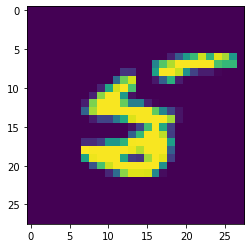

In [151]:
plt.imshow(test_image.reshape(28,28))